# 政治人物選舉前後的字詞運用比較－－以林佳龍與盧秀燕為例   

目的: 延續作業01-03，將資料中林與盧的文章內文的所使用言詞做分析，看看有無選前選後言詞不一，或是討好選民的跡象。   
方法: 取林與盧FB的粉專貼文，分為兩類: 1-10月、11月至隔年1月，利用jieba, word2vec, PCA等方法，做出各字詞間的關聯性。

In [1]:
# 匯入程式庫
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
import shutil

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 開啟檔案
def readFiles(name):
    row = pd.read_csv(name+'only'+'201801_data.csv', engine='python', encoding='utf-8')
    row.close()
    for i in range(2, 10):
        f = pd.read_csv(name+'only'+'20180'+str(i)+'_data.csv', engine='python', encoding='utf-8')
        row = row.append(f)
        f.close()
    for i in range(10, 13):
        f = pd.read_csv(name+'only'+'2018'+str(i)+'_data.csv', engine='python', encoding='utf-8')
        row = row.append(f)
        f.close()
    f = pd.read_csv(name+'only'+'201901_data.csv', engine='python', encoding='utf-8')
    row = row.append(f)
    return row

LinData = readFiles("林佳龍")
LuData = readFiles("盧秀燕")

先在前次作業篩選資料，儲存到HW04-06的檔案位置以方便讀取。   
清理資料時發現，除了林與盧自己的粉專內文是自己寫的，其他粉絲團都是轉發兩者的文章，所以這裡的檔案內容只包含林佳龍與盧秀燕自己粉專的貼文。

In [3]:
# 修改index，以理後續作業
LinData['Date'] = pd.to_datetime(LinData['Date'])
LinData.set_index(LinData['Date'], inplace=True)

print(LinData.shape)
LinData.head()

(718, 18)


,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
Date,,,,,,,,,,,,,,,,,,
2018-01-01 00:51:08,2018-01-01 00:51:08,林佳龍,153819538009272,NaN,photo,5675,5575,2,77,14,1,5,133,74,台中迎接2018花博年，在倒數聲中，我們與家人、情人、朋友度過興奮又感動的時刻。揮別2017...,Photos from 林佳龍's post,NaN,1514739068000
2018-01-01 11:54:27,2018-01-01 11:54:27,林佳龍,153819538009272,NaN,photo,3518,3414,1,45,30,3,24,114,60,2018年的第一天，我們回顧2017年的豐收，心中充滿感謝；並以歡喜的心迎接台中的花博年、捷...,NaN,NaN,1514778867000
2018-01-01 18:46:06,2018-01-01 18:46:06,林佳龍,153819538009272,NaN,video,2833,2765,3,42,15,1,7,142,64,豐收的2017年，嶄新的2018年，我們以感恩喜悅的心情，繼續往前邁進。\n\n2017年，...,NaN,NaN,1514803566000
2018-01-01 22:05:45,2018-01-01 22:05:45,林佳龍,153819538009272,NaN,photo,2244,2202,2,30,6,1,3,53,49,你知道嗎？在維也納有項百年傳統，就是以一系列圓舞曲來迎接新年。今年，台中也打造了我們首次的專...,Photos from 林佳龍's post,NaN,1514815545000
2018-01-01 18:08:04,2018-01-01 18:08:04,林佳龍,153819538009272,NaN,photo,874,859,1,13,0,0,0,34,20,NaN,林佳龍's cover photo,NaN,1514801284000


In [4]:
LuData['Date'] = pd.to_datetime(LuData['Date'])
LuData.set_index(LuData['Date'], inplace=True)

print(LuData.shape)
LuData.head()

(836, 18)


,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
Date,,,,,,,,,,,,,,,,,,
2018-01-01 07:55:19,2018-01-01 07:55:19,盧秀燕,109391162488374,NaN,video,1787,1722,2,57,5,0,0,159,53,嗨！107年元旦快樂！🎉🎊🎈\n\n秀燕正參加升旗典禮。\n\n祝 #中華民國 \n#國運昌...,NaN,NaN,1514764519000
2018-01-01 08:55:19,2018-01-01 08:55:19,盧秀燕,109391162488374,NaN,video,849,816,0,27,5,0,1,62,42,嗨！107年元旦快樂！🎉🎊🎈\n\n秀燕正參加升旗典禮。\n\n祝 #中華民國 \n#國運昌...,NaN,NaN,1514768119000
2018-01-01 11:55:36,2018-01-01 11:55:36,盧秀燕,109391162488374,NaN,link,305,262,4,0,20,0,19,32,13,【補丁護照 「行」得通嗎？】\n\n為減少損失，外交部公開表示，用「防偽貼紙」處理錯印的...,護照用錯照片烏龍 外交部以防偽貼紙補救 | 政治 | 要聞 | 聯合新聞網,外交部發行新版晶片護照，但內頁卻出現與美國杜勒斯機場極雷同的照片，引發爭議，外交部晚上舉行記...,1514778936000
2018-01-03 09:03:43,2018-01-03 09:03:43,盧秀燕,109391162488374,NaN,video,836,754,12,26,5,1,38,159,126,【林佳龍領導的中市府螺絲🔩掉満地，再度出包❗️】\n\n4500本 「花博精裝筆記本」錯誤百...,NaN,NaN,1514941423000
2018-01-03 18:11:28,2018-01-03 18:11:28,盧秀燕,109391162488374,NaN,status,315,277,4,3,0,2,29,47,26,【125億中火室內煤倉工程\n 今天再度流標！\n林佳龍市長明任期屆滿下台...,NaN,NaN,1514974288000


In [6]:
# print(type(LinData[0]['Message']))
# print(len(LinData))
# for i in range(len(LinData)):
#     print(len(LinData[i]['Message']))
# LinData[0]['Message']

In [5]:
# 匯入斷詞工具
#encoding=utf-8

import jieba
import re
import jieba.analyse

In [6]:
# 自定義斷詞檔案
prog = re.compile('[\s+\.\!\/_,$%^*(+\"\'-]+|[+——→！，。？：:；“”、~@#￥%……&*（）(\d+)「」『』《》【】│]+|[0-9]+|[a-z]', re.I)
jieba.load_userdict("userdict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.850 seconds.
Prefix dict has been built succesfully.


In [7]:
# 停用詞
stopWords = []
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [9]:
# result = prog.sub('', LinData[0]['Message'][3])
# result

In [91]:
# word = ''
# words = pd.Series(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# for i in range(len(LinData[1]['Message'])):    
#     if type(LinData[1]['Message'][i]) == str:
#         message = prog.sub('',LinData[1]['Message'][i])
#         word += message
#         words[2] = word
# words

In [90]:
# def getWord(n, words):
#     word = ''
#     for i in range(len(LinData[n]['Message'])):
#         if type(LinData[n]['Message'][i]) == str:
#             message = prog.sub('',LinData[n]['Message'][i])
#             message = re.sub('臺中', '台中', message)
#             message = re.sub('台中市', '台中', message)
#             message = re.sub('臺灣', '台灣', message)
#             word += message
#             words[n+1] = word
#     return words

# LinWords = pd.Series(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# for j in range(13):
#     getWord(j, LinWords)
# LinWords

In [12]:
# test = jieba.lcut(LinWords[1], cut_all=False)
# test

In [13]:
# jieba.analyse.extract_tags(str(test), topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn'))

In [96]:
# words01_10 = LinWords[0:10].str.cat()
# type(words01_10)
# words01_10

之前多做的很多麻煩的步驟

In [8]:
# 清理文字稿
m = prog.sub('',LinData['2018-01':'2018-10']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lin01_10 = re.sub('臺灣', '台灣', message)

Lin01_10

'台中迎接花博年在倒數聲中我們與家人情人朋友度過興奮又感動的時刻揮別迎接佳龍祝福您幸福平安快樂跨年夜這天我們的警察義交市府同仁及志工等都早早到場部屬引導民眾進入會場欣賞演出演出後也協助疏散人群進行環境整理今晚跨年晚會加上花毯節接駁人潮團隊服務人次高達萬佳龍在此要對我們的同仁致上最高敬意大家散場時不妨也向他們道聲辛苦了新年快樂接下來年台中將舉辦世界花卉博覽會及東亞青年運動會將台中上市國際讓世界看見台中新的一年讓我們繼續手牽著手心連著心一起為台中為台灣進步而努力再次祝大家新年快樂早上還有元旦升旗卡早睡卡有眠我們點市府廣場見感謝辛苦的團隊台中元旦升旗年的第一天我們回顧年的豐收心中充滿感謝並以歡喜的心迎接台中的花博年捷運年元旦升旗典禮的兩個畫面讓我深深感動領唱國歌的成員有許多是新住民朋友這代表台中是多元族群和諧發展的城市成為許多新住民的新故鄉另外在元旦這天我們看見藍天綠地白雲正是宜居城市不可或缺的要素年我們立下時代里程碑包含成為第二大城都市計畫通過及爭取前瞻基礎建設全壘打經過年的努力內政部正式通過台中縣市合併後的都市計畫這是打造台中宜居樂活城市的地圖可確保大台中一條山手線兩大海空港三個副都心的落實在確保農地不會過度開發的同時也有工商發展的空間前瞻基礎建設台中所提的計畫全壘打爭取中央投資中部其中以軌道建設與水環境治理為大宗隨鐵路高架化山手線正式通過未來台中不再有偏遠地區環狀鐵路將每個區域串成珍珠每顆珍珠都彌足珍貴美麗城市需要有可以親近的河川打造水岸花都不是口號正一步一步落實柳川正進行全流域治理往上下游延伸綠川在農曆年前後也即將開放原縣區豐原的葫蘆墩圳已經動工還有軟埤仔溪旱溪康橋計畫南山截水溝新社九曲溝治理我們逐步落實展望我也許下個願望第一希望花博圓滿舉辦第二希望捷運綠線如期完工試運轉第三希望台中的空品越來越好防制空汙市府帶頭做亦是全民運動距離聯合國指標微克台中還有微克努力空間讓我們一起加油豐收的年嶄新的年我們以感恩喜悅的心情繼續往前邁進年台中躍升第二大城縣市合併後的都市計畫通過更爭取中央前瞻計畫投資台中讓便捷的環狀線十字軌道運輸串起台中每個角落不再讓城鄉差異阻礙均衡發展我們也繼續打造水岸花都整治大台中的河流讓台中充滿水與綠年我許下個願望第一是花博圓滿舉辦第二是捷運綠線如期完工試運轉第三要台中的空氣品質越來越好讓我們一起加油你知道嗎在維也納有項百年傳統就是以一系列圓舞曲來迎接新

In [18]:
jieba.analyse.extract_tags(Lin01_10, topK=20, withWeight=False, allowPOS=())

['台中',
 '我們',
 '佳龍',
 '台灣',
 '花博',
 '進步',
 '已經',
 '捷運',
 '綠川',
 '成為',
 '市府',
 '未來',
 '大家',
 '繼續',
 '發展',
 '一個',
 '因為',
 '邀請',
 '城市',
 '公車']

In [10]:
# 林佳龍 01~10 月的斷詞
seg_list_1 = jieba.cut(Lin01_10, cut_all=False)

# 移除停用詞及跳行符號
seg_list_1 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_1))

In [46]:
seg_list_1[0:10]

['台中', '迎接', '花博', '倒數聲', '中', '家人', '情人', '朋友', '度過', '興奮']

In [11]:
# 將斷詞存成 txt
path = "Lin's_201801_10.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_1)):
        f.write(seg_list_1[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [12]:
# 清理文字稿
m = prog.sub('',LinData['2018-11':'2019-01']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lin11_201901 = re.sub('臺灣', '台灣', message)

Lin11_201901

'聆聽花開的聲音我們在台中世界花博擁抱過去享受當下碰觸未來年透過台北世大運聖火台攫住世界目光的豪華朗機工團隊今年在台中與家在地企業協作共創結合藝術科技與產業打造台中世界花博最強地標地表最大機械花聆聽花開的聲音如同巴黎艾菲爾鐵塔日本太陽之塔等大型博覽會留下的瑰寶聆聽花開的聲音將是台中花博獻給台中與世界的美好禮物台中世界花卉博覽會豪華朗機工地表最大機械花上銀科技大銀微系統義力營造瑞助營造利茗機械台灣飛利浦照明廣源造紙際峰機械鈑金大振豐洋傘台中文教基金會亞洲大學人工智慧學院中國醫藥大學暨醫療體系直播回來囉花博開幕晚會記者會台中花博周六正式開幕晚會落實區域加值理念選在水湳智慧城的中央公園內舉辦近百米寬的舞台超過組上千人表演團隊演繹花與人相伴億年的故事月日晚上一定要來★台中花博開幕晚會時間六地點水湳智慧城中央公園河南路與凱旋路口往北公尺處接駁前歡迎開車後請於洲際棒球場秋紅谷搭接駁車★晚會轉播平台▲電視中視綜合台數位台全國有線電視三立都會台中華電信花博專區▲網路林佳龍粉專台中世界花卉博覽會粉專台中政府官方帳號三立新聞網中視頻道直播花博開幕晚會記者會台中花博周六正式開幕晚會落實區域加值理念選在水湳智慧城的中央公園內舉辦近百米寬的舞台超過組近千人表演團隊演繹花與人相伴億年的故事月日晚上一定要來★台中花博開幕晚會時間六地點水湳智慧城中央公園河南路與凱旋路口往北公尺處接駁前歡迎開車後請於洲際棒球場秋紅谷搭接駁車★晚會轉播平台▲電視中視綜合台數位台全國有線電視三立都會台中華電信花博專區▲網路林佳龍臉書粉專台中世界花卉博覽會粉專台中政府官方帳號三立新聞網中視頻道台中花博夜間版花博開幕就是明天當陽光從大地褪去台中花博在夜裡綻放自己的光芒特別感謝國際燈光大師──周鍊老師讓夜間版的花博呈現出另一種獨特的風貌彷彿一個花博變成了兩個各領風騷台中世界花卉博覽會周鍊真的美翻了花博也有星光票喔水湳規劃大翻新明天的花博開幕晚會就選在即將誕生的水湳智慧城舉辦我們對水湳的期待是智慧城市的典範而不是七期的複製品水湳機場遷出後騰出公頃土地被視為台中區最珍貴的寶地根據年公佈的都市計畫水湳經貿園區被定位為大型經貿商業區在土地使用分區項目上可作住宅用地興建高樓但我們擔心這將加劇炒房現象而這是不利台中長遠發展的經過多次學者專家激盪我們在年月發佈調整都市計畫內容以智慧創新低碳的核心概念重新界定大項重大建設其中創新研發專用區也

In [16]:
jieba.analyse.extract_tags(Lin11_201901, topK=20, withWeight=False, allowPOS=())

['台中',
 '我們',
 '進步',
 '佳龍',
 '台灣',
 '花博',
 '大家',
 '林佳龍',
 '選擇',
 '直播',
 '已經',
 '謝謝',
 '時間',
 '延續',
 '一起',
 '未來',
 '感謝',
 '繼續',
 '一個',
 '市長']

In [108]:
# jieba.analyse.extract_tags(Lin11_201901, topK=50, withWeight=False, allowPOS=('ns', 'n', 'vn'))

以上兩者的計算速度差很多，有指定詞性的跑太久了，便不執行

In [14]:
# 林佳龍 11~隔年 1 月的斷詞
seg_list_2 = jieba.cut(Lin11_201901, cut_all=False)

# 移除停用詞及跳行符號
seg_list_2 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_2))

In [49]:
seg_list_2.index('中')

491

In [19]:
# 將斷詞存成 txt
path = "Lin's_201811_201901.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_2)):
        f.write(seg_list_2[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [16]:
import word2vec

In [69]:
# jieba分詞轉為word2vec向量
word2vec.word2vec("Lin's_201801_10.txt", "Lin's_201801_10.bin", size=300, verbose=True)
word2vec.word2vec("Lin's_201811_201901.txt", "Lin's_201811_201901.bin", size=300, verbose=True)

Starting training using file Lin's_201801_10.txt
Vocab size: 2182
Words in train file: 37669
Starting training using file Lin's_201811_201901.txt
Vocab size: 583
Words in train file: 7312


In [76]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LinWord01_10 = word2vec.load("Lin's_201801_10.bin")
index1_1,metrics1_1 = LinWord01_10.cosine('台灣')
index1_2,metrics1_2 = LinWord01_10.cosine('台中')
index1_3,metrics1_3 = LinWord01_10.cosine('花博')
index1_4,metrics1_4 = LinWord01_10.cosine('佳龍')
index1_5,metrics1_5 = LinWord01_10.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index1_01 = np.where(LinWord01_10.vocab == '台灣')
index1_02 = np.where(LinWord01_10.vocab == '台中')
index1_03 = np.where(LinWord01_10.vocab == '花博')
index1_04 = np.where(LinWord01_10.vocab == '佳龍')
index1_05 = np.where(LinWord01_10.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index1_1 = np.append(index1_1,index1_01)
index1_2 = np.append(index1_2,index1_02)
index1_3 = np.append(index1_3,index1_03)
index1_4 = np.append(index1_4,index1_04)
index1_5 = np.append(index1_5,index1_05)

In [119]:
LinWord11_01 = word2vec.load("Lin's_201811_201901.bin")
index2_1,metrics2_1 = LinWord11_01.cosine('台灣')
index2_2,metrics2_2 = LinWord11_01.cosine('台中')
index2_3,metrics2_3 = LinWord11_01.cosine('花博')
index2_4,metrics2_4 = LinWord11_01.cosine('佳龍')
index2_5,metrics2_5 = LinWord11_01.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])

# 所選字詞
index2_01 = np.where(LinWord11_01.vocab == '台灣')
index2_02 = np.where(LinWord11_01.vocab == '台中')
index2_03 = np.where(LinWord11_01.vocab == '花博')
index2_04 = np.where(LinWord11_01.vocab == '佳龍')
index2_05 = np.where(LinWord11_01.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index2_1 = np.append(index2_1,index2_01)
index2_2 = np.append(index2_2,index2_02)
index2_3 = np.append(index2_3,index2_03)
index2_4 = np.append(index2_4,index2_04)
index2_5 = np.append(index2_5,index2_05)

In [72]:
from sklearn.decomposition import PCA
# zhfont = matplotlib.font_manager.FontProperties(fname='wqy-microhei.ttc')

In [89]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec01 = LinWord01_10.vectors
rawWordVec02 = LinWord11_01.vectors

# 將原本300維向量空間降為2維
X_reduced01 = PCA(n_components=2).fit_transform(rawWordVec01)
X_reduced02 = PCA(n_components=2).fit_transform(rawWordVec02)

In [121]:
# 清理文字稿
m = prog.sub('',LuData['2018-01':'2018-10']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lu01_10 = re.sub('臺灣', '台灣', message)

Lu01_10

'嗨年元旦快樂🎉🎊🎈秀燕正參加升旗典禮祝中華民國國運昌隆人民幸福藍天再現嗨年元旦快樂🎉🎊🎈秀燕正參加升旗典禮祝中華民國國運昌隆人民幸福藍天再現大鵬新城補丁護照行得通嗎為減少損失外交部公開表示用防偽貼紙處理錯印的萬本護照有民眾向秀燕表示他們對此舉感到疑慮萬一發生類似台灣國貼紙受外國海關刁難事件怎麼辦任何國家的國民身份文件均要求完整無瑕以防偽造不實中華民國政府開年的第一個決策就是補丁護照令國人行不安心而且根據我國護照條例第條第條及護照條例施行細則第條第條補丁行為均屬暇疵增刪塗改人民有權要求更換亦得予廢止外交部自行加工補丁應屬違法而且此例一開未來身份證戶口名簿權狀印錯均可補丁公務員何必用心又要如何辨別何者是官方補丁何者是私人偽造身份證條例護照條例等等文件規劃法律都形同虛設了護照補丁護照護照條例護照照條例施行細則外交部中央印製廠林佳龍領導的中市府螺絲🔩掉満地再度出包❗️本花博精裝筆記本錯誤百出全面回收浪費民脂民膏💢盧秀燕市議員沈佑蓮陳成添賴順仁台中議員陳政顯阿顯專頁賴順仁服務處直播記者會實況🎥螺絲出包浪費預算花博月曆精裝筆記本台中公車路線圖沈佑蓮陳成添賴順仁陳政顯億中火室內煤倉工程今天再度流標林佳龍市長明任期屆滿下台前確定來不及改善空汚民進黨政府承諾的第一個台中燃煤發電空氣汚染改善工程億室內煤倉計劃今天再度流標中部空汚改善遙遙又跳票且遙遙無期中火億室內煤倉計劃我始終關注密集追蹤沒想到上個月日竟然流標我曾在上獨家揭露希望行政院和台中政府改善空汚的支票不要說一套做一套當時林佳龍市長還輕蔑的回應我的監督信心滿滿的表示一定會迅速招標出去及執行今天再度招標也是只有一家投標也是流標如果編了億預算都標不出去行政能力如此之差又奢言改善空污行政院長賴清德台中長林佳龍改善空污各吹各的調秀燕主張收回中火部分執照要求其確定執行相關空汚改善工程並且有績效再准予換照林佳龍市長提前換照張給中火棄械投降枉顧市民健康前往台中高鐵站途中台中空氣品質糟透了環保署監測站顯示台中籠罩在空汚紅害中林佳龍市長已提前把張執照換發給台中燃煤火力發電廠准許中火機組全部上缐民眾無奈只能當人體空氣清淨機用肺換電盧秀燕❌年代向錢看選戰起跑🏃\u200d♀️關鍵決戰中台灣👊☑️首播🕓時間月日四下午📺年代新聞台☑️重播🕕時間月日五上午📺年代台年代向錢看年代新聞民進黨一年二修勞基法引起天下大亂早安台中天氣濕冷保暖外套雨具不可少前往台北立

In [122]:
m = prog.sub('',LuData['2018-11':'2019-01']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lu11_01 = re.sub('臺灣', '台灣', message)

Lu11_01

'直播📽️挺燕新歌🎤社福懶人包發表會👊秀燕誓言要讓小的好老的好年輕人沒煩惱影片連結請點👉現場更邀請到為我創作專屬的素人歌手🎶來談談創作緣由並為大家獻唱新的一天就從好政見好歌曲開始👍洪御倫好立委楊瓊瓔歌名盧秀燕曲詞盧秀燕關心市民完全不留心力面對誘惑諂媚也不會隨意聽信台中好媳婦不會陌生還感到親近對於你的訴求他願意拼命實施幼兒安全局內托育讓家長安心上班不必多慮從孩子成長與您吸到的空氣您的支持會讓秀燕更有衝勁想要重現乾淨的天空恢復老人健保減輕子女負擔燕子能讓台中再次展翅高飛不怕辛苦不怕勞累依舊拼勁十足在未來的每天每天說出的承諾拍著胸脯都會兌現說出的承諾每一件都會兌現都會兌現台中需要蛻變輿論對手抹黑都放在白紙背面不去理會不願造成敵對每日每夜都早出晚歸鄉親都看在眼裡面不用臉書轉貼翻新的水溝蓋還有重舖的路大至人行道的樹小至身上穿的布吃進肚子的這是台中好媳婦搭配執政的酷市長換人空氣換新市民說的話秀燕她都會聽正字記號淡藍色的背心不分晝夜三號她是最拚最拚想想這些年大家是怎麼過來秀燕沒有財團沒有撐腰沒有後台像是天使一樣純潔的白不怕惡劣對待恢復榮景攜手迎向大台中的未來在任何工作他都能夠如魚得水犧牲奉獻所有只要他還能給歷經二十年的沉澱希望能把最好那一面都給你呈現歷經二十年的沉澱希望能把最好那一面都給你呈現人們樂於讓燕子在自己的房屋中築巢生兒育女並引以為吉祥有福的事富市三③市長換人空氣換新我們值得更好的台中💡線上捐款請進入🚪🎉點選加入秀燕群📣🎉點選訂閱秀燕頻道📣行程預告📆台中富市⓷大型市政說明會秀燕邀請大家逗陣挺⓷而出明晚一起參加台中挺秀燕全力拼經濟市政說明會🙋\u200d♀時間⌚️星期五地點🚩沙鹿區保成路保成八街交叉口沙鹿運十九棒球場富市三⓷市長換人空氣換新我們值得更好的台中顏寬恒朱立倫💡線上捐款請進入🚪🎉點選加入秀燕群📣🎉點選訂閱秀燕頻道📣生意很差不知道該怎麼辦攤商的這句話在秀燕的腦海裡盤旋不去台中這幾年經濟停滯及衰弱勞工薪資是六都之末坊間庶民消費力不再經濟成長動能便十分低落在政府無能的施政下大家貨賣不出去錢自然賺不進來當逢甲商圈主委語重心長跟秀燕說請救逢甲商圈一下我知道我的責任重大受電視專題採訪現任市長林佳龍與秀燕分別對台中經濟發表不同的看法林佳龍從冰冷的官方數據認為台中經濟很好忽略地方真正的民意而秀燕從許多資料佐證傾聽市民的心聲知道大家都在反映經濟生活並沒有改善記者形容得很好林佳龍和我

In [191]:
# 盧秀燕斷詞
seg_list_3 = jieba.cut(Lu01_10, cut_all=False)
seg_list_4 = jieba.cut(Lu11_01, cut_all=False)

# 移除停用詞及跳行符號
seg_list_3 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_3))
seg_list_4 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_4))

In [192]:
# 將斷詞存成 txt
path = "Lu's_201801_201810.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_3)):
        f.write(seg_list_3[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [193]:
path = "Lu's_201811_201901.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_4)):
        f.write(seg_list_4[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [217]:
# jieba分詞轉為word2vec向量
word2vec.word2vec("Lu's_201801_201810.txt", "Lu's_201801_10.bin", size=300, verbose=True)
word2vec.word2vec("Lu's_201811_201901.txt", "Lu's_201811_201901.bin", size=300, verbose=True)

Starting training using file Lu's_201801_201810.txt
Vocab size: 1285
Words in train file: 24364
Starting training using file Lu's_201811_201901.txt
Vocab size: 429
Words in train file: 6988


In [218]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LuWord01_10 = word2vec.load("Lu's_201801_10.bin")
index3_1,metrics3_1 = LuWord01_10.cosine('台灣')
index3_2,metrics3_2 = LuWord01_10.cosine('台中')
index3_3,metrics3_3 = LuWord01_10.cosine('花博')
index3_4,metrics3_4 = LuWord01_10.cosine('秀燕')
index3_5,metrics3_5 = LuWord01_10.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index3_01 = np.where(LuWord01_10.vocab == '台灣')
index3_02 = np.where(LuWord01_10.vocab == '台中')
index3_03 = np.where(LuWord01_10.vocab == '花博')
index3_04 = np.where(LuWord01_10.vocab == '秀燕')
index3_05 = np.where(LuWord01_10.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index3_1 = np.append(index3_1,index3_01)
index3_2 = np.append(index3_2,index3_02)
index3_3 = np.append(index3_3,index3_03)
index3_4 = np.append(index3_4,index3_04)
index3_5 = np.append(index3_5,index3_05)

In [219]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LuWord11_01 = word2vec.load("Lu's_201811_201901.bin")
index4_1,metrics3_1 = LuWord11_01.cosine('台灣')
index4_2,metrics3_2 = LuWord11_01.cosine('台中')
index4_3,metrics3_3 = LuWord11_01.cosine('花博')
index4_4,metrics3_4 = LuWord11_01.cosine('秀燕')
index4_5,metrics3_5 = LuWord11_01.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index4_01 = np.where(LuWord11_01.vocab == '台灣')
index4_02 = np.where(LuWord11_01.vocab == '台中')
index4_03 = np.where(LuWord11_01.vocab == '花博')
index4_04 = np.where(LuWord11_01.vocab == '秀燕')
index4_05 = np.where(LuWord11_01.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index4_1 = np.append(index4_1,index4_01)
index4_2 = np.append(index4_2,index4_02)
index4_3 = np.append(index4_3,index4_03)
index4_4 = np.append(index4_4,index4_04)
index4_5 = np.append(index4_5,index4_05)

In [220]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec03 = LuWord01_10.vectors
rawWordVec04 = LuWord11_01.vectors

# 將原本300維向量空間降為2維
X_reduced03 = PCA(n_components=2).fit_transform(rawWordVec03)
X_reduced04 = PCA(n_components=2).fit_transform(rawWordVec04)

<IPython.core.display.Javascript object>


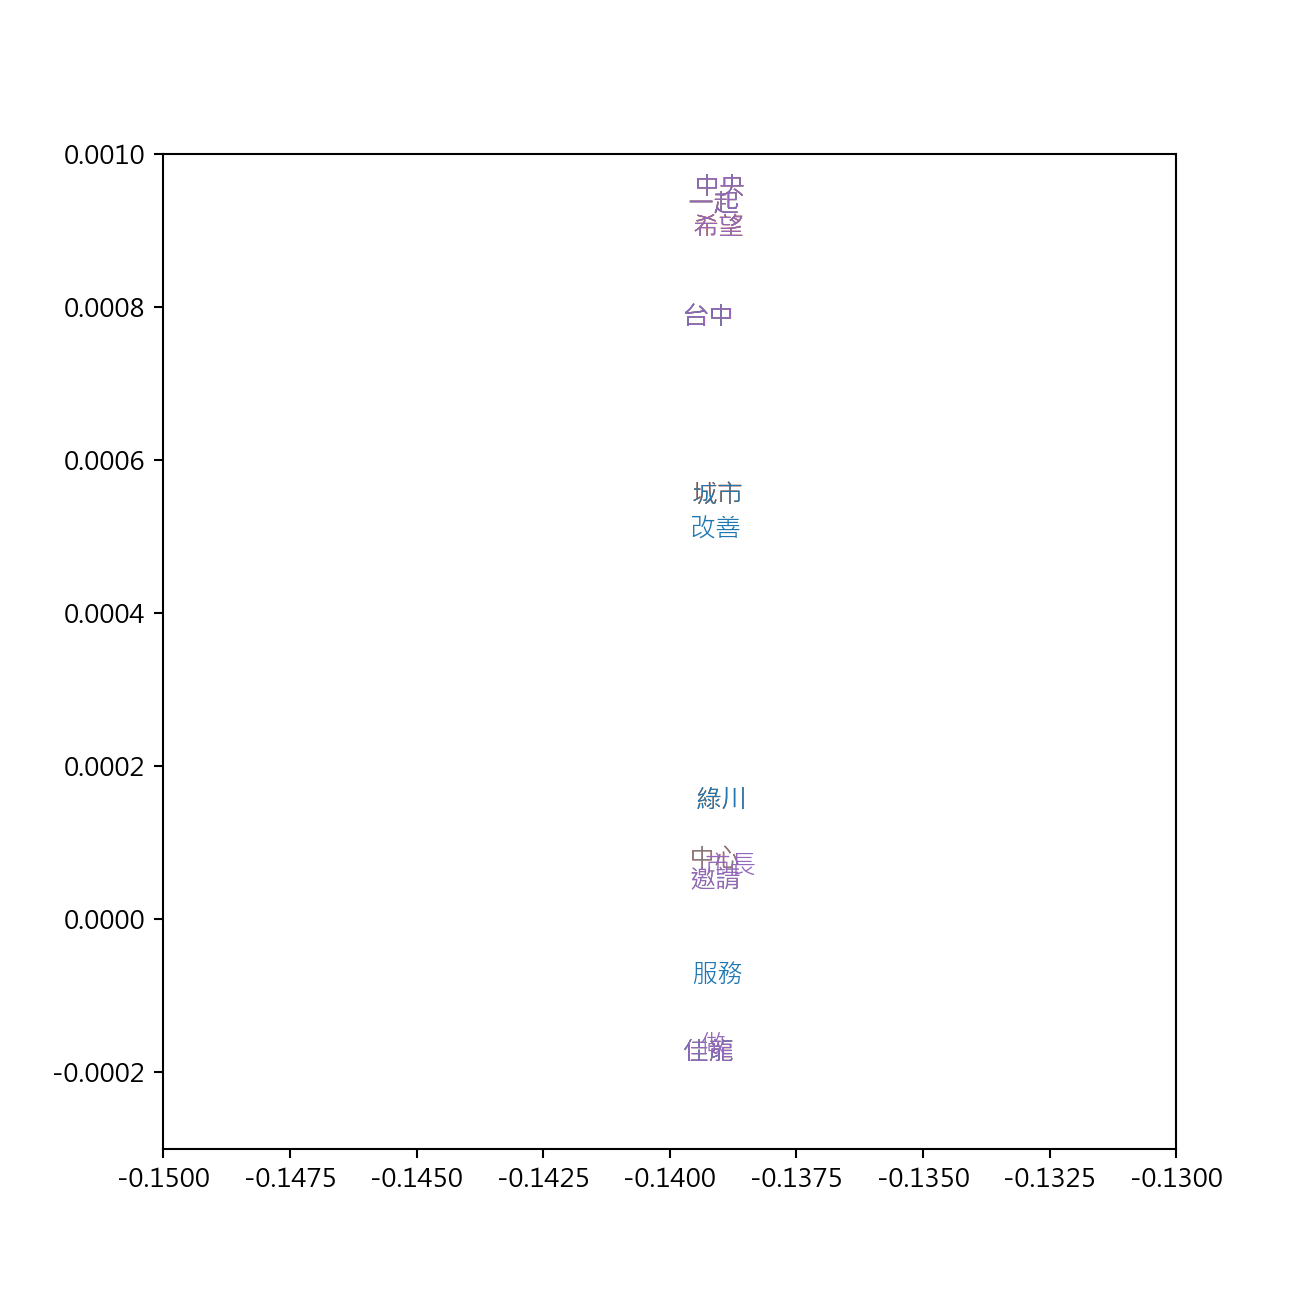

In [114]:
# 印出分析結果
fig01_10 = plt.figure(figsize=(6,6))
ax1 = fig01_10.add_subplot(111)
 
for i in index1_1:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C3')
for i in index1_2:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color= 'C1')
for i in index1_3:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C7')
for i in index1_4:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C0')
for i in index1_5:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C4')

    ax1.axis([-0.15,-0.13,-0.0003,0.001])
plt.show(fig01_10)

<IPython.core.display.Javascript object>


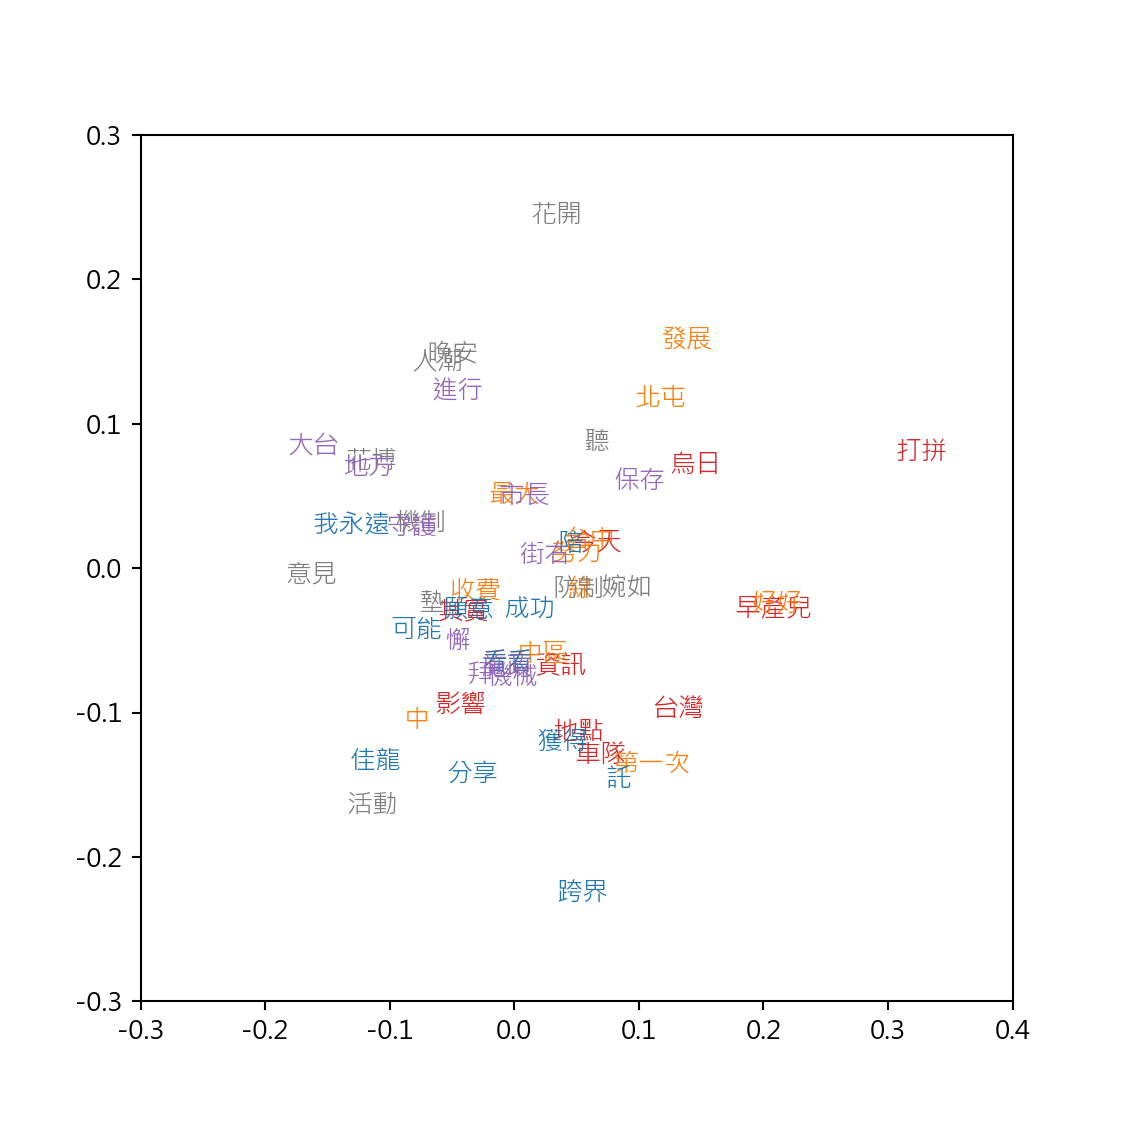

In [120]:
fig11_01 = plt.figure(figsize=(6,6))
ax = fig11_01.add_subplot(111)
 
for i in index2_1:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C3')
for i in index2_2:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color= 'C1')
for i in index2_3:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C7')
for i in index2_4:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C0')
for i in index2_5:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C4')

    ax.axis([-0.3,0.4,-0.3,0.3])
plt.show()

<IPython.core.display.Javascript object>


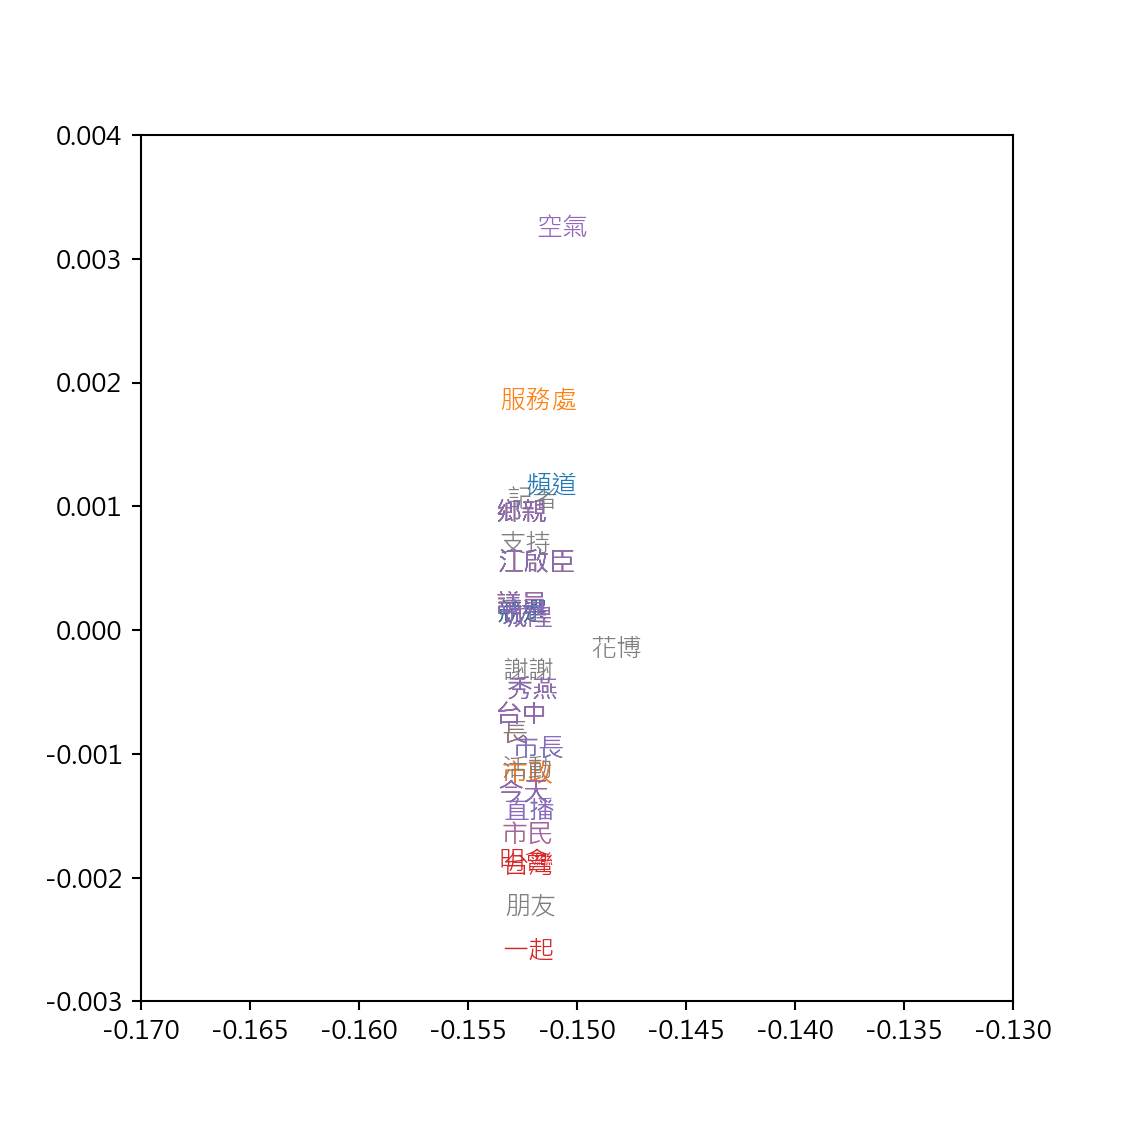

In [226]:
fig2_01_10 = plt.figure(figsize=(6,6))
ax3 = fig2_01_10.add_subplot(111)
 
for i in index3_1:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C3')
for i in index3_2:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color= 'C1')
for i in index3_3:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C7')
for i in index3_4:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C0')
for i in index3_5:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C4')

    ax3.axis([-0.17,-0.13,-0.003,0.004])
plt.show(fig2_01_10)

<IPython.core.display.Javascript object>


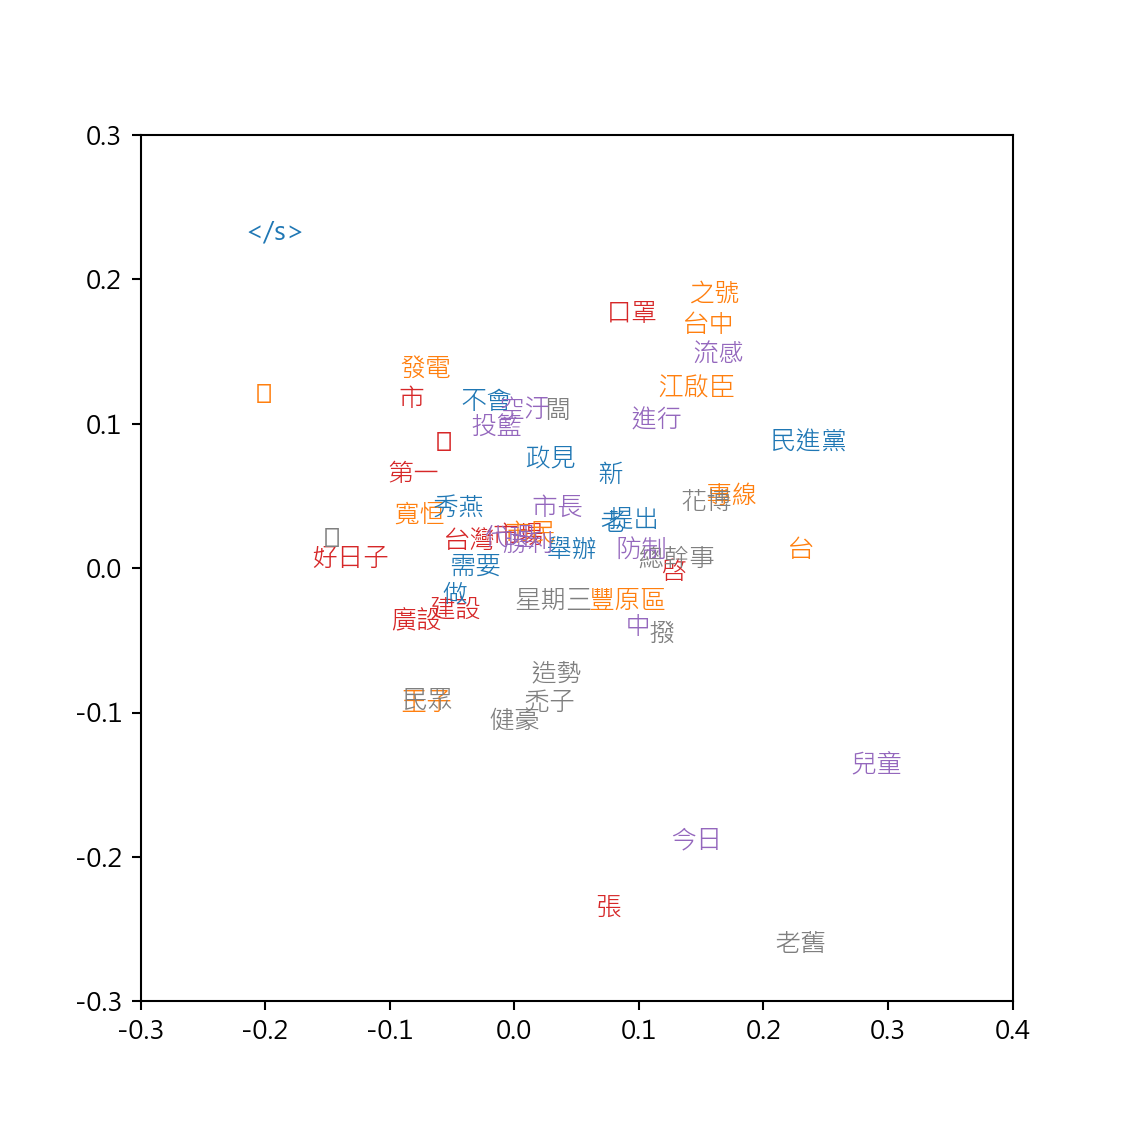

In [227]:
fig2_11_01 = plt.figure(figsize=(6,6))
ax4 = fig2_11_01.add_subplot(111)
 
for i in index4_1:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C3')
for i in index4_2:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color= 'C1')
for i in index4_3:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C7')
for i in index4_4:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C0')
for i in index4_5:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C4')

    ax4.axis([-0.3,0.4,-0.3,0.3])
plt.show(fig2_11_01)

從圖得知，兩者在選前的詞彙關聯度滿大的，需要縮小很多範圍才能看得清楚，選後字詞就明顯分散。   

不過這次分析十分粗糙，原因(藉口)是期中考也好不容易考完後才有心力做作業，但為了要準備之後的專題而去看其他的分析方法，所以自定義詞類沒有好好寫完，盧秀燕的文章一大堆emoji也沒有刪除乾淨，所以分析結果很奇怪，有相當的誤差，不過在之後會以更嚴謹的方法去分析字詞。   

下面的圖原本是想繼續分析下去，比較按讚高的文章與按讚低的文章所用字詞的差異，雖然沒有執行下去，但還是以這張圖作結(林佳龍的聲量其實滿高的，不過還是輸盧秀燕，也許是其他因素有所影響)。

<IPython.core.display.Javascript object>


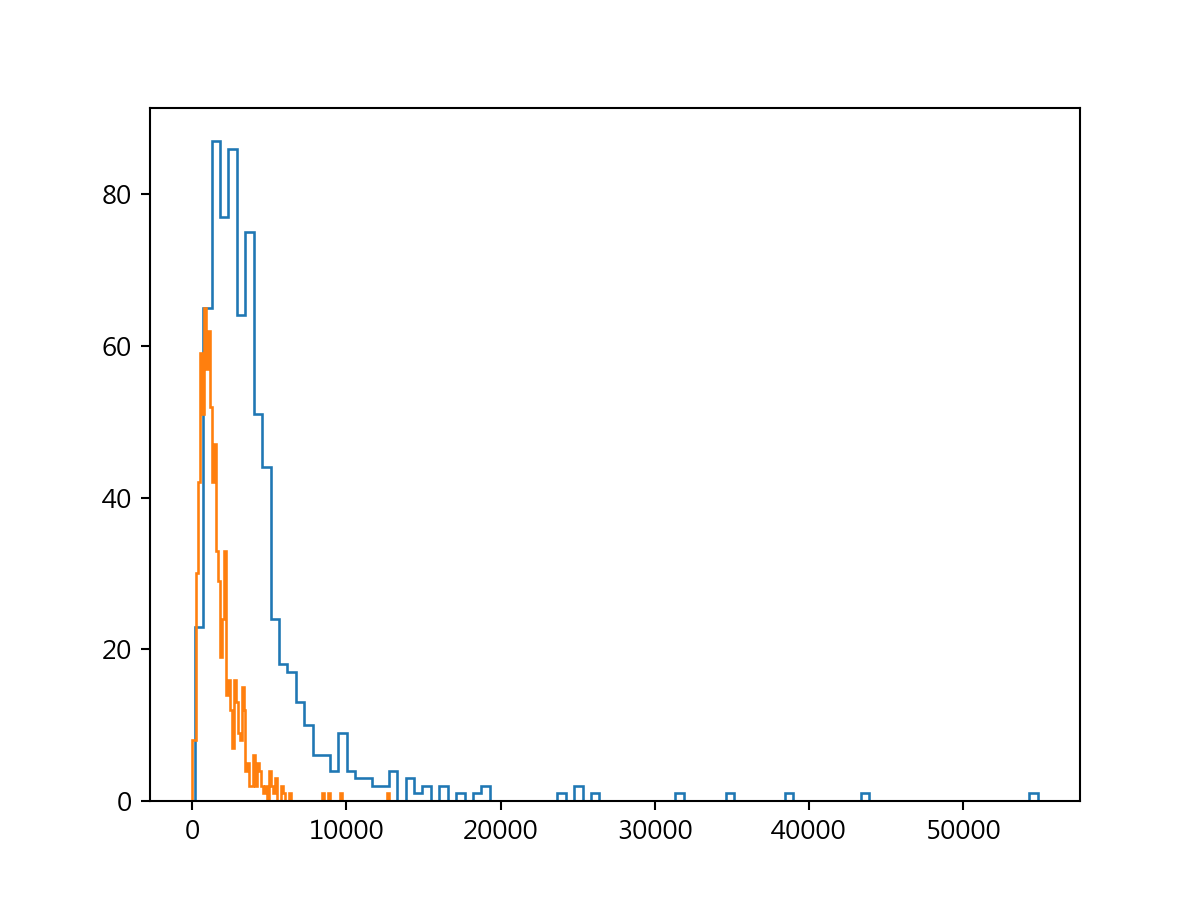

(array([ 8.,  8., 30., 42., 59., 51., 65., 57., 62., 52., 42., 47., 33.,
        29., 19., 24., 33., 14., 16., 12.,  7., 16., 13.,  9.,  8., 15.,
        12.,  4.,  5.,  2.,  2.,  6.,  2.,  5.,  4.,  2.,  1.,  2.,  0.,
         4.,  2.,  1.,  3.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.000000e+00, 1.318100e+02, 2.596200e+02, 3.874300e+02,
        5.152400e+02, 6.430500e+02, 7.708600e+02, 8.986700e+02,
        1.026480e+03, 1.154290e+03, 1.282100e+03, 1.409910e+03,
        1.537720e+03, 1.665530e+03, 1.793340e+03, 1.921150e+03,
        2.048960e+03, 2.176770e+03, 2.304580e+03, 2.432390e+03,
        2.560200e+03, 2.688010e+03, 2.815820e+03, 2.943630e+03,
        3.071440e+03, 3.199250e+03, 3.327060e+03, 

In [109]:
plt.hist(LinData['All_Reaction_Count'], bins=100, histtype='step')
plt.hist(LuData['All_Reaction_Count'], bins=100, histtype='step')